In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#load the data into a dataframe
filepath = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MachineLearning-Data.xlsx"
df = pd.read_excel(filepath)

#drop one of the useless column.
df =  df.drop(columns=['DA concentration'])

#assign feature and target variables and display the rows of the dataframe.
X = df.drop('DA Concentration (uM)', axis=1) 
y = df['DA Concentration (uM)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the features same as SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
#let's define our artificial neural network model
def ANN_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_test_scaled.shape[1], activation='relu'))
    # model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    return model

#compile the model and print the summary
model = ANN_model()
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

c:\Users\Admin\.conda\envs\DataCamp\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 6883.0894 - val_loss: 5546.4902
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4842.2173 - val_loss: 5441.0781
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5361.8560 - val_loss: 5280.6992
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3798.7795 - val_loss: 5071.4688
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4696.8594 - val_loss: 4825.0713
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4202.1162 - val_loss: 4534.3149
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3843.3125 - val_loss: 4194.2578
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4355.2080 - val_loss: 3891.9524
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6293.2456 - val_loss: 3665.8643
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3837.7600 - val_loss: 3539.6580
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3818.2683 - val_loss: 3427.7849
Epoch 12

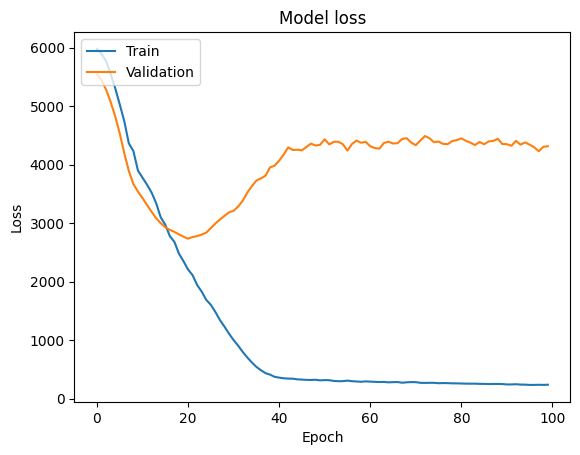

In [9]:
#train the model and plot the training history as training progresses
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss') 
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
#predict the target variable using the test set
y_pred = model.predict(X_test_scaled)
#show predictions vs actual values
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
    Actual   Predicted
13       0    0.119485
39     200  163.793472
30      75   78.880699
45      30   34.505760
17      10   18.036018
48      30   92.879379
26      50   37.545681
25      50   45.757404
32     100   93.643837
19      20   21.024742


In [11]:
mse_ann = mean_squared_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

# Output performance metrics
print(f"Mean Squared Error (ANN Manual Test Split): {mse_ann}")
print(f"R^2 Score (ANN Manual Test Split): {r2_ann}")

print(f"Predicted values (ANN): {y_pred[:5].flatten()}")
print(f"Actual values (ANN): {y_test[:5].values}")

Mean Squared Error (ANN Manual Test Split): 557.9243139924345
R^2 Score (ANN Manual Test Split): 0.820038914680481
Predicted values (ANN): [1.19484976e-01 1.63793472e+02 7.88806992e+01 3.45057602e+01
 1.80360184e+01]
Actual values (ANN): [  0 200  75  30  10]


In [12]:
#let's plot the predicted values against the actual values
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.values,
    y=y_pred.flatten(),
    mode='markers',
    name='Predictions',
    marker=dict(color='blue', opacity=0.5)
))

# Add the diagonal line for actual value
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    width=800,
    height=600,
    hovermode='closest'
)

fig.show()